In [48]:
###import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata
import os
import yfinance as yf
import math
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from matplotlib.dates import DateFormatter
import statistics
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from textblob import TextBlob, Word
from datetime import datetime, timedelta
import time

In [46]:
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('opinion_lexicon')
nltk.download('subjectivity')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aagambandi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aagambandi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aagambandi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/aagambandi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aagambandi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/aagambandi/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package subjectivity to
[nltk_data]     /Users/aagambandi/nltk_data...
[nltk_data]   Packa

True

In [50]:
import requests
import time
import pandas as pd

# Function to get articles from NY Times Archive
def get_articles(year, month, api_key):
    endpoint = f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json?api-key={api_key}"
    response = requests.get(endpoint)
    if response.status_code == 200:
        response_json = response.json()
        return response_json['response']['docs']
    else:
        print(f"Failed to retrieve data for {year}-{month}: Status Code {response.status_code}")
        return []

# Initialize lists for storing headlines and publication dates
headlines = []
publication_dates = []

# Define the API key for NY Times
api_key = 'YUs3h1AqQIwtuQMbmXji71oCDh1AIRyX'

# Loop through each year and month to gather data
for year in range(2020, 2024):
    for month in range(1, 13):
        print(f"Retrieving data for {year}-{month}")
        try:
            articles = get_articles(year, month, api_key)
            if articles:
                headlines.extend([article['headline']['main'] for article in articles])
                publication_dates.extend([article['pub_date'] for article in articles])
            # Respect API rate limits
            time.sleep(6)
        except Exception as e:
            print(f"Error during data retrieval for {year}-{month}: {e}")

# Construct a DataFrame with the collected data
df = pd.DataFrame({
    'datetime': publication_dates,
    'headline': headlines
})

# Convert datetime strings to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract date from datetime
df['date'] = df['datetime'].dt.date

keywords = ['Google', 'GOOGL', 'Alphabet Inc', 'Google stock', 'Google shares', 'Google Inc', 'Alphabet stock', 'Alphabet shares']
df['is_google_related'] = df['headline'].apply(lambda x: any(keyword in x for keyword in keywords))

# Create a DataFrame with only Apple-related articles
google_news_df = df[df['is_google_related']]

# Group articles by date and concatenate headlines
grouped_google_news = google_news_df.groupby('date')['headline'].agg(' '.join).reset_index()

grouped_google_news.columns = ['Date', 'Combined Headlines']
grouped_google_news['Date'] = pd.to_datetime(grouped_google_news['Date'])


print(grouped_google_news)


Retrieving data for 2020-1
Retrieving data for 2020-2
Retrieving data for 2020-3
Retrieving data for 2020-4
Retrieving data for 2020-5
Retrieving data for 2020-6
Retrieving data for 2020-7
Retrieving data for 2020-8
Failed to retrieve data for 2020-8: Status Code 429
Retrieving data for 2020-9
Retrieving data for 2020-10
Retrieving data for 2020-11
Retrieving data for 2020-12
Retrieving data for 2021-1
Retrieving data for 2021-2
Failed to retrieve data for 2021-2: Status Code 429
Retrieving data for 2021-3
Retrieving data for 2021-4
Retrieving data for 2021-5
Retrieving data for 2021-6
Retrieving data for 2021-7
Retrieving data for 2021-8
Retrieving data for 2021-9
Retrieving data for 2021-10
Retrieving data for 2021-11
Retrieving data for 2021-12
Retrieving data for 2022-1
Retrieving data for 2022-2
Retrieving data for 2022-3
Retrieving data for 2022-4
Retrieving data for 2022-5
Retrieving data for 2022-6
Failed to retrieve data for 2022-6: Status Code 429
Retrieving data for 2022-7
R

In [71]:
grouped_google_news.rename(columns={'Combined Headlines': 'Headline'}, inplace=True)
stock_name = 'GOOGL'  # Replace with the actual stock name
grouped_google_news['Stock Name'] = stock_name

In [51]:
import requests
import time
import pandas as pd

# Function to get articles from NY Times Archive
def get_articles(year, month, api_key):
    endpoint = f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json?api-key={api_key}"
    response = requests.get(endpoint)
    if response.status_code == 200:
        response_json = response.json()
        return response_json['response']['docs']
    else:
        print(f"Failed to retrieve data for {year}-{month}: Status Code {response.status_code}")
        return []

# Initialize lists for storing headlines and publication dates
headlines = []
publication_dates = []

# Define the API key for NY Times
api_key = 'YUs3h1AqQIwtuQMbmXji71oCDh1AIRyX'

# Loop through each year and month to gather data
for year in range(2020, 2024):
    for month in range(1, 13):
        print(f"Retrieving data for {year}-{month}")
        try:
            articles = get_articles(year, month, api_key)
            if articles:
                headlines.extend([article['headline']['main'] for article in articles])
                publication_dates.extend([article['pub_date'] for article in articles])
            # Respect API rate limits
            time.sleep(6)
        except Exception as e:
            print(f"Error during data retrieval for {year}-{month}: {e}")


df = pd.DataFrame({
    'datetime': publication_dates,
    'headline': headlines
})

# Convert datetime strings to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract date from datetime
df['date'] = df['datetime'].dt.date

# Filter articles related to Apple Inc.
keywords = ['Apple', 'AAPL', 'Apple Inc', 'Apple stock', 'Apple shares', 'Apple Inc.', 'Apple Company', 'Apple Corporation']
df['is_apple_related'] = df['headline'].apply(lambda x: any(keyword in x for keyword in keywords))

# Create a DataFrame with only Apple-related articles
apple_news_df = df[df['is_apple_related']]

# Group articles by date and concatenate headlines
grouped_apple_news = apple_news_df.groupby('date')['headline'].agg(' '.join).reset_index()

# Rename columns for clarity
grouped_apple_news.columns = ['Date', 'Combined Headlines']
grouped_apple_news['Date'] = pd.to_datetime(grouped_google_news['Date'])


# Display the final DataFrame
print(grouped_apple_news)


Retrieving data for 2020-1
Retrieving data for 2020-2
Retrieving data for 2020-3
Retrieving data for 2020-4
Retrieving data for 2020-5
Retrieving data for 2020-6
Retrieving data for 2020-7
Retrieving data for 2020-8
Retrieving data for 2020-9
Failed to retrieve data for 2020-9: Status Code 429
Retrieving data for 2020-10
Retrieving data for 2020-11
Retrieving data for 2020-12
Retrieving data for 2021-1
Retrieving data for 2021-2
Retrieving data for 2021-3
Retrieving data for 2021-4
Retrieving data for 2021-5
Retrieving data for 2021-6
Retrieving data for 2021-7
Retrieving data for 2021-8
Failed to retrieve data for 2021-8: Status Code 429
Retrieving data for 2021-9
Retrieving data for 2021-10
Retrieving data for 2021-11
Retrieving data for 2021-12
Retrieving data for 2022-1
Retrieving data for 2022-2
Failed to retrieve data for 2022-2: Status Code 429
Retrieving data for 2022-3
Failed to retrieve data for 2022-3: Status Code 429
Retrieving data for 2022-4
Retrieving data for 2022-5
Ret

In [72]:
grouped_apple_news.rename(columns={'Combined Headlines': 'Headline'}, inplace=True)
stock_name = 'AAPL'  # Replace with the actual stock name
grouped_apple_news['Stock Name'] = stock_name

In [54]:
import requests
import time
import pandas as pd

# Function to get articles from NY Times Archive
def get_articles(year, month, api_key):
    endpoint = f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json?api-key={api_key}"
    response = requests.get(endpoint)
    if response.status_code == 200:
        response_json = response.json()
        return response_json['response']['docs']
    else:
        print(f"Failed to retrieve data for {year}-{month}: Status Code {response.status_code}")
        return []

# Initialize lists for storing headlines and publication dates
headlines = []
publication_dates = []

# Define the API key for NY Times
api_key = 'YUs3h1AqQIwtuQMbmXji71oCDh1AIRyX'

# Loop through each year and month to gather data
for year in range(2020, 2024):
    for month in range(1, 13):
        print(f"Retrieving data for {year}-{month}")
        try:
            articles = get_articles(year, month, api_key)
            if articles:
                headlines.extend([article['headline']['main'] for article in articles])
                publication_dates.extend([article['pub_date'] for article in articles])
            # Respect API rate limits
            time.sleep(6)
        except Exception as e:
            print(f"Error during data retrieval for {year}-{month}: {e}")


df = pd.DataFrame({
    'datetime': publication_dates,
    'headline': headlines
})


df['datetime'] = pd.to_datetime(df['datetime'])


df['date'] = df['datetime'].dt.date


keywords = [
    'Tesla', 'TSLA', 'Tesla Inc', 'Tesla stock', 'Tesla shares', 'Tesla Motors', 
    'Elon Musk', 'Tesla Model S', 'Tesla Model 3', 'Tesla Model X'
]
df['is_tesla_related'] = df['headline'].apply(lambda x: any(keyword in x for keyword in keywords))


tesla_news_df = df[df['is_tesla_related']]


grouped_tesla_news = tesla_news_df.groupby('date')['headline'].agg(' '.join).reset_index()


grouped_tesla_news.columns = ['Date', 'Combined Headlines']
grouped_tesla_news['Date'] = pd.to_datetime(grouped_tesla_news['Date'])




Retrieving data for 2020-1
Retrieving data for 2020-2
Retrieving data for 2020-3
Retrieving data for 2020-4
Retrieving data for 2020-5
Retrieving data for 2020-6
Retrieving data for 2020-7
Retrieving data for 2020-8
Retrieving data for 2020-9
Retrieving data for 2020-10
Retrieving data for 2020-11
Retrieving data for 2020-12
Retrieving data for 2021-1
Retrieving data for 2021-2
Retrieving data for 2021-3
Retrieving data for 2021-4
Retrieving data for 2021-5
Retrieving data for 2021-6
Retrieving data for 2021-7
Retrieving data for 2021-8
Retrieving data for 2021-9
Retrieving data for 2021-10
Retrieving data for 2021-11
Retrieving data for 2021-12
Retrieving data for 2022-1
Retrieving data for 2022-2
Retrieving data for 2022-3
Retrieving data for 2022-4
Retrieving data for 2022-5
Retrieving data for 2022-6
Retrieving data for 2022-7
Retrieving data for 2022-8
Retrieving data for 2022-9
Retrieving data for 2022-10
Retrieving data for 2022-11
Retrieving data for 2022-12
Retrieving data for

In [73]:
grouped_tesla_news.rename(columns={'Combined Headlines': 'Headline'}, inplace=True)
stock_name = 'TSLA'  # Replace with the actual stock name
grouped_tesla_news['Stock Name'] = stock_name

In [56]:
grouped_tesla_news

,Date,Combined Headlines
0,2020-01-03,Tesla Reports Record Output as Elon Musk Achie...
1,2020-01-22,Tesla Value Hits $100 Billion. Will Elon Musk ...
2,2020-01-23,She’s Taking on Elon Musk on Solar. And Winning.
3,2020-01-29,"As Tesla Earnings Arrive, Bulls and Bears Cont..."
4,2020-01-30,Elon Musk Hits Back at Critics
...,...,...
348,2023-11-20,Why on Earth Are Jewish Leaders Praising Elon ...
349,2023-11-27,Elon Musk Visits Israel Amid Backlash Against ...
350,2023-11-28,Tesla Sues Swedish Transport Agency in Dispute...
351,2023-11-29,"Elon Musk, Kamala Harris, Isaac Herzog: Takeaw..."


In [55]:
grouped_tesla_news.shape

(353, 2)

In [ ]:
import requests
import time
import pandas as pd

# Function to get articles from NY Times Archive with retry mechanism sice it was giving error with source code 429 which arises due to less sleep time
def get_articles(year, month, api_key):
    endpoint = f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json?api-key={api_key}"
    max_retries = 5  # Maximum number of retries
    retry_delay = 5  # Initial retry delay in seconds
    
    for retry_count in range(max_retries):
        try:
            response = requests.get(endpoint)
            if response.status_code == 200:
                response_json = response.json()
                return response_json['response']['docs']
            elif response.status_code == 429:
                print(f"Rate limit exceeded. Waiting and retrying ({retry_count+1}/{max_retries})...")
                time.sleep(retry_delay)
                retry_delay *= 2  # Exponential backoff
            else:
                print(f"Failed to retrieve data for {year}-{month}: Status Code {response.status_code}")
                return []
        except Exception as e:
            print(f"Error fetching data for {year}-{month}: {e}")
            time.sleep(retry_delay)
            retry_delay *= 2  # Exponential backoff
    
    print(f"Failed after {max_retries} retries. Moving to the next request.")
    return []

# Initialize lists for storing headlines and publication dates
headlines = []
publication_dates = []

# Define the API key for NY Times
api_key = 'YUs3h1AqQIwtuQMbmXji71oCDh1AIRyX'

# Loop through each year and month to gather data
for year in range(2020, 2024):
    for month in range(1, 13):
        print(f"Retrieving data for {year}-{month}")
        try:
            articles = get_articles(year, month, api_key)
            if articles:
                headlines.extend([article['headline']['main'] for article in articles])
                publication_dates.extend([article['pub_date'] for article in articles])
            # Respect API rate limits
            time.sleep(7)  # Adjust sleep time based on API rate limits
        except Exception as e:
            print(f"Error during data retrieval for {year}-{month}: {e}")

# Construct a DataFrame with the collected data
df = pd.DataFrame({
    'datetime': publication_dates,
    'headline': headlines
})

# Convert datetime strings to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract date from datetime
df['date'] = df['datetime'].dt.date

# Filter articles related to Amazon Inc.
keywords = [
    'Amazon', 'Amazon.com', 'Amazon Inc', 'Amazon.com Inc', 'Amazon stock', 
    'Amazon shares', 'Amazon.com stock', 'Amazon.com shares', 'Amazon company', 
    'Amazon.com company', 'Amazon Prime', 'Amazon Web Services', 'AWS', 
    'Amazon earnings', 'Amazon revenue', 'Amazon financials', 'Jeff Bezos'
]
df['is_amazon_related'] = df['headline'].apply(lambda x: any(keyword in x for keyword in keywords))

# Create a DataFrame with only Amazon-related articles
amazon_news_df = df[df['is_amazon_related']]


grouped_amazon_news = amazon_news_df.groupby('date')['headline'].agg(' '.join).reset_index()


grouped_amazon_news.columns = ['Date', 'Combined Headlines']
grouped_amazon_news['Date'] = pd.to_datetime(grouped_amazon_news['Date'])
print(grouped_amazon_news)


In [74]:
grouped_amazon_news.rename(columns={'Combined Headlines': 'Headline'}, inplace=True)
stock_name = 'AMZN'  # Replace with the actual stock name
grouped_amazon_news['Stock Name'] = stock_name

In [75]:
grouped_amazon_news

,Date,Headline,Stock Name
0,2020-01-20,India Targets Jeff Bezos Over Amazon and Washi...,AMZN
1,2020-01-21,"How Amazon, Geico and Walmart Fund Propaganda",AMZN
2,2020-01-22,Jeff Bezos’s Lesson: Beware WhatsApp Accounts ...,AMZN
3,2020-01-23,"Jeff Bezos, Tabloid Man",AMZN
4,2020-01-24,Jeff Bezos’ Hack Inquiry Falls Short of Implic...,AMZN
...,...,...,...
405,2023-11-28,Where the Flavors of the Amazon Rainforest Del...,AMZN
406,2023-12-01,Jeff Bezos’ Giant Yacht Is Apparently Too Big ...,AMZN
407,2023-12-08,"Amazon Is Cracking Down on Union Organizing, W...",AMZN
408,2023-12-10,Amazon Suit Claims International Ring Stole Mi...,AMZN


In [ ]:
import requests
import time
import pandas as pd

# Function to get articles from NY Times Archive
def get_articles(year, month, api_key):
    endpoint = f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json?api-key={api_key}"
    response = requests.get(endpoint)
    if response.status_code == 200:
        response_json = response.json()
        return response_json['response']['docs']
    else:
        print(f"Failed to retrieve data for {year}-{month}: Status Code {response.status_code}")
        return []

# Initialize lists for storing headlines and publication dates
headlines = []
publication_dates = []

# Define the API key for NY Times
api_key = 'YUs3h1AqQIwtuQMbmXji71oCDh1AIRyX'

# Loop through each year and month to gather data
for year in range(2020, 2024):
    for month in range(1, 13):
        print(f"Retrieving data for {year}-{month}")
        try:
            articles = get_articles(year, month, api_key)
            if articles:
                headlines.extend([article['headline']['main'] for article in articles])
                publication_dates.extend([article['pub_date'] for article in articles])
            # Respect API rate limits
            time.sleep(6)
        except Exception as e:
            print(f"Error during data retrieval for {year}-{month}: {e}")

# Construct a DataFrame with the collected data
df = pd.DataFrame({
    'datetime': publication_dates,
    'headline': headlines
})


df['datetime'] = pd.to_datetime(df['datetime'])


df['date'] = df['datetime'].dt.date


keywords = [
    'Toyota', 'TM', 'Toyota Motor', 'Toyota Motor Corp', 'Toyota Motor Corporation', 'Toyota stock', 
    'Toyota shares', 'Toyota company', 'TM stock', 'TM shares', 'Toyota earnings', 'Toyota revenue', 
    'Toyota financials', 'Toyota vehicles', 'Toyota cars', 'Toyota trucks', 'Toyota hybrids', 
    'Toyota CEO', 'Toyota manufacturing', 'Toyota production'
]


df['is_toyota_related'] = df['headline'].apply(lambda x: any(keyword in x for keyword in keywords))


toyota_news_df = df[df['is_toyota_related']]


grouped_toyota_news = toyota_news_df.groupby('date')['headline'].agg(' '.join).reset_index()


grouped_toyota_news.columns = ['Date', 'Combined Headlines']
grouped_toyota_news['Date'] = pd.to_datetime(grouped_toyota_news['Date'])
print(grouped_toyota_news)




In [76]:
grouped_toyota_news.rename(columns={'Combined Headlines': 'Headline'}, inplace=True)
stock_name = 'TM'  # Replace with the actual stock name
grouped_toyota_news['Stock Name'] = stock_name

In [66]:
grouped_toyota_news

,Date,Combined Headlines
0,2020-08-25,A Former TMZ Host Claims the Gossip Outlet Had...
1,2021-01-14,Toyota to Pay a Record Fine for a Decade of Cl...
2,2021-04-01,"Toyota sales jump, but G.M. and Ford’s rebound..."
3,2021-07-08,Toyota says it will stop donating to Republica...
4,2021-07-19,Toyota pulls its Olympics TV ads in Japan.
5,2021-07-25,Toyota Led on Clean Cars. Now Critics Say It W...
6,2021-07-27,"Toyota, a pioneer of hybrids, resists the push..."
7,2021-08-06,How Biden’s E.V. Plan Could Help Tesla and Squ...
8,2021-08-19,"Toyota, hurt by the chip shortage, will reduce..."
9,2021-09-10,Toyota to cut production 40% in October becaus...


In [ ]:
import requests
import time
import pandas as pd

# Function to get articles from NY Times Archive
def get_articles(year, month, api_key):
    endpoint = f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json?api-key={api_key}"
    response = requests.get(endpoint)
    if response.status_code == 200:
        response_json = response.json()
        return response_json['response']['docs']
    else:
        print(f"Failed to retrieve data for {year}-{month}: Status Code {response.status_code}")
        return []

# Initialize lists for storing headlines and publication dates
headlines = []
publication_dates = []

# Define the API key for NY Times
api_key = 'YUs3h1AqQIwtuQMbmXji71oCDh1AIRyX'

# Loop through each year and month to gather data
for year in range(2020, 2024):
    for month in range(1, 13):
        print(f"Retrieving data for {year}-{month}")
        try:
            articles = get_articles(year, month, api_key)
            if articles:
                headlines.extend([article['headline']['main'] for article in articles])
                publication_dates.extend([article['pub_date'] for article in articles])
            # Respect API rate limits
            time.sleep(6)
        except Exception as e:
            print(f"Error during data retrieval for {year}-{month}: {e}")


df = pd.DataFrame({
    'datetime': publication_dates,
    'headline': headlines
})


df['datetime'] = pd.to_datetime(df['datetime'])


df['date'] = df['datetime'].dt.date


keywords = [
    'Disney', 'Walt Disney', 'Disney Co', 'Walt Disney Co', 'Disney Company', 'Walt Disney Company', 
    'Disney stock', 'Disney shares', 'Disney Inc', 'Disney earnings', 'Disney revenue', 
    'Disney financials', 'Disney movies', 'Disney streaming', 'Disney+',
    'Disney theme parks', 'Disneyland', 'Disney World', 'Disney CEO', 'Bob Chapek'
]



df['is_disney_related'] = df['headline'].apply(lambda x: any(keyword in x for keyword in keywords))


disney_news_df = df[df['is_disney_related']]


grouped_disney_news = disney_news_df.groupby('date')['headline'].agg(' '.join).reset_index()

# Rename columns for clarity
grouped_disney_news.columns = ['Date', 'Combined Headlines']
grouped_disney_news['Date'] = pd.to_datetime(grouped_disney_news['Date'])
print(grouped_disney_news)




In [77]:
grouped_disney_news.rename(columns={'Combined Headlines': 'Headline'}, inplace=True)
stock_name = 'DIS'  # Replace with the actual stock name
grouped_disney_news['Stock Name'] = stock_name

In [78]:
grouped_disney_news

,Date,Headline,Stock Name
0,2020-01-08,"Would You Work for Nothing at Disney? 10,000 S...",DIS
1,2020-01-11,"In Disney Races, Cartoonish Gear Is the Front-...",DIS
2,2020-01-17,Disney Drops Fox From Names of Studios It Boug...,DIS
3,2020-01-21,Netflix Reports a Subscriber Bump as Disney Po...,DIS
4,2020-02-04,Disney Plus Racks Up 28.6 Million Subscribers,DIS
...,...,...,...
201,2023-09-11,"Disney and Charter Reach Agreement, Ending Cab...",DIS
202,2023-09-14,‘A Ticket to Disney’? Politicians Charge Milli...,DIS
203,2023-09-18,Bear Sighting Forces Closures at Disney World,DIS
204,2023-09-19,"Disney, Challenged Elsewhere, Plans to Spend $...",DIS


In [79]:
news_data =pd.concat([grouped_google_news, grouped_amazon_news, grouped_tesla_news, grouped_apple_news, grouped_toyota_news, grouped_disney_news], ignore_index=True)

In [80]:
working_dir = "/Users/aagambandi/Desktop/Finance_Project/Stock_Sentiment_Analysis"
news_data_csv = os.path.join(working_dir, "news_data.csv")
if not os.path.isfile(news_data_csv):
    pd.DataFrame(columns=['Date', 'Headline', 'Stock Name']).to_csv(news_data_csv, index=False)


In [81]:
news_data.to_csv(news_data_csv, mode='a', header=not os.path.isfile(stock_data_csv), index=False)

In [82]:
tickers = ['GOOGL', 'AAPL', 'AMZN', 'TSLA', 'DIS', 'TM']

In [83]:
Stock=pd.DataFrame()  
start_date = "2023-07-01"  
end_date = "2024-06-14"   
dfs = [] 
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date).reset_index()  # Reset index to make 'Date' a column
    data['Stock Name'] = ticker  # Add a column for the ticker symbo
    dfs.append(data)

# Combine all individual dataframes into a single dataframe
Stock = pd.concat(dfs, ignore_index=True)

# Reorder columns as per the desired format
Stock = Stock[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Stock Name']]

 

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [84]:
Stock.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2023-07-03,119.239998,120.190002,118.820000,119.900002,119.762550,14467900,GOOGL
1,2023-07-05,119.239998,122.610001,119.230003,121.750000,121.610428,27584800,GOOGL
2,2023-07-06,119.800003,120.300003,118.400002,120.110001,119.972313,24745200,GOOGL
3,2023-07-07,120.099998,121.050003,119.400002,119.480003,119.343033,21692600,GOOGL
4,2023-07-10,118.300003,118.309998,116.139999,116.449997,116.316498,35315200,GOOGL


In [85]:
print(Stock)

           Date        Open        High         Low       Close   Adj Close  \
0    2023-07-03  119.239998  120.190002  118.820000  119.900002  119.762550   
1    2023-07-05  119.239998  122.610001  119.230003  121.750000  121.610428   
2    2023-07-06  119.800003  120.300003  118.400002  120.110001  119.972313   
3    2023-07-07  120.099998  121.050003  119.400002  119.480003  119.343033   
4    2023-07-10  118.300003  118.309998  116.139999  116.449997  116.316498   
...         ...         ...         ...         ...         ...         ...   
1435 2024-06-07  206.500000  207.699997  206.199997  206.360001  206.360001   
1436 2024-06-10  207.500000  208.610001  207.279999  208.020004  208.020004   
1437 2024-06-11  206.500000  207.000000  204.500000  205.309998  205.309998   
1438 2024-06-12  207.520004  207.520004  205.580002  205.649994  205.649994   
1439 2024-06-13  200.250000  200.380005  198.179993  199.350006  199.350006   

        Volume Stock Name  
0     14467900      GOO

In [87]:
##Let's save this stock data to a seperate csv file
stock_data_path_csv = os.path.join(working_dir, "stock_data.csv")
if not os.path.isfile(stock_data_path_csv):
    pd.DataFrame(columns=['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Stock Name']).to_csv(stock_data_path_csv, index=False)



In [88]:
Stock.to_csv(stock_data_path_csv, mode='a', header=not os.path.isfile(stock_data_path_csv), index=False)

In [105]:
db = pd.read_csv(news_data_csv)

In [106]:
db

,Date,Headline,Stock Name
0,Date,Headline,Stock Name
1,2020-01-07,"Sonos, Squeezed by the Tech Giants, Sues Google",GOOGL
2,2020-01-16,"Google Reaches $1 Trillion in Value, Even as I...",GOOGL
3,2020-01-24,Have a Search Warrant for Data? Google Wants Y...,GOOGL
4,2020-01-31,Why Google Backtracked on Its New Search Resul...,GOOGL
...,...,...,...
1453,2023-09-11,"Disney and Charter Reach Agreement, Ending Cab...",DIS
1454,2023-09-14,‘A Ticket to Disney’? Politicians Charge Milli...,DIS
1455,2023-09-18,Bear Sighting Forces Closures at Disney World,DIS
1456,2023-09-19,"Disney, Challenged Elsewhere, Plans to Spend $...",DIS


In [107]:
###Sentiment Analysis
###Let's add a column named polarity score to db and calculate the polarity scores related to each text and store it in it
db['polarity_score']=''


In [108]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

# Initialize the sentiment analyzer
sent_analyzer = SentimentIntensityAnalyzer()

# Iterate through each headline and analyze sentiment
for index, row in db.iterrows():
    # Normalize the headline text
    normalized_headline = unicodedata.normalize("NFKD", row["Headline"])
    
    # Perform sentiment analysis
    sentiment_scores = sent_analyzer.polarity_scores(normalized_headline)
    
    # Store the compound sentiment score in a new column
    db.at[index, "polarity_score"] = sentiment_scores["compound"]

In [109]:
db


,Date,Headline,Stock Name,polarity_score
0,Date,Headline,Stock Name,0.0
1,2020-01-07,"Sonos, Squeezed by the Tech Giants, Sues Google",GOOGL,0.0
2,2020-01-16,"Google Reaches $1 Trillion in Value, Even as I...",GOOGL,0.3818
3,2020-01-24,Have a Search Warrant for Data? Google Wants Y...,GOOGL,-0.1027
4,2020-01-31,Why Google Backtracked on Its New Search Resul...,GOOGL,0.0
...,...,...,...,...
1453,2023-09-11,"Disney and Charter Reach Agreement, Ending Cab...",DIS,0.5106
1454,2023-09-14,‘A Ticket to Disney’? Politicians Charge Milli...,DIS,0.0
1455,2023-09-18,Bear Sighting Forces Closures at Disney World,DIS,0.0
1456,2023-09-19,"Disney, Challenged Elsewhere, Plans to Spend $...",DIS,-0.1027


In [110]:
def get_sentiment_label(text):
    # Analyze sentiment
    sentiment_score = sent_analyzer.polarity_scores(text)["compound"]
    
    # Determine sentiment label
    if sentiment_score > 0:
        return "positive"
    elif sentiment_score == 0:
        return "neutral"
    else:
        return "negative"

# Apply sentiment analysis and create new column for sentiment labels
db["sentiment_label"] = db["Headline"].apply(get_sentiment_label)

In [111]:
db

,Date,Headline,Stock Name,polarity_score,sentiment_label
0,Date,Headline,Stock Name,0.0,neutral
1,2020-01-07,"Sonos, Squeezed by the Tech Giants, Sues Google",GOOGL,0.0,neutral
2,2020-01-16,"Google Reaches $1 Trillion in Value, Even as I...",GOOGL,0.3818,positive
3,2020-01-24,Have a Search Warrant for Data? Google Wants Y...,GOOGL,-0.1027,negative
4,2020-01-31,Why Google Backtracked on Its New Search Resul...,GOOGL,0.0,neutral
...,...,...,...,...,...
1453,2023-09-11,"Disney and Charter Reach Agreement, Ending Cab...",DIS,0.5106,positive
1454,2023-09-14,‘A Ticket to Disney’? Politicians Charge Milli...,DIS,0.0,neutral
1455,2023-09-18,Bear Sighting Forces Closures at Disney World,DIS,0.0,neutral
1456,2023-09-19,"Disney, Challenged Elsewhere, Plans to Spend $...",DIS,-0.1027,negative


In [98]:
db.shape


(1458, 5)

In [99]:
###Let's use LabelEncoder from sci-kit learn library to convert categorical labels to numerical labels
db["sentiment_label"] = LabelEncoder().fit_transform(db["sentiment_label"])


In [100]:
db

,Date,Headline,Stock Name,polarity_score,sentiment_label
0,Date,Headline,Stock Name,0.0,1
1,2020-01-07,"Sonos, Squeezed by the Tech Giants, Sues Google",GOOGL,0.0,1
2,2020-01-16,"Google Reaches $1 Trillion in Value, Even as I...",GOOGL,0.3818,2
3,2020-01-24,Have a Search Warrant for Data? Google Wants Y...,GOOGL,-0.1027,0
4,2020-01-31,Why Google Backtracked on Its New Search Resul...,GOOGL,0.0,1
...,...,...,...,...,...
1453,2023-09-11,"Disney and Charter Reach Agreement, Ending Cab...",DIS,0.5106,2
1454,2023-09-14,‘A Ticket to Disney’? Politicians Charge Milli...,DIS,0.0,1
1455,2023-09-18,Bear Sighting Forces Closures at Disney World,DIS,0.0,1
1456,2023-09-19,"Disney, Challenged Elsewhere, Plans to Spend $...",DIS,-0.1027,0


In [112]:
# Preprocessing function
def preprocessing(df):
    # Convert to lower case
    df = df.str.lower()
    # Remove punctuation
    df = df.str.replace('[^\w\s]', '', regex=True)
    # Remove numbers
    df = df.str.replace('\d', '', regex=True)
    # Remove stopwords
    sw = stopwords.words('english')
    df = df.apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
    # Remove infrequent words
    temp_df = pd.Series(' '.join(df).split()).value_counts()
    drops = temp_df[temp_df <= 1]
    df = df.apply(lambda x: " ".join(x for x in x.split() if x not in drops))
    return df

# Tokenization function
def tokenization(df):
    df = df.apply(lambda x: TextBlob(x).words)
    return df

# Lemmatization function
def lemmatized(df):
    df = df.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    return df

# Term frequency function
def term_fre(df):
    tf = df.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
    tf.columns = ['words', 'tf']
    tf_sorted = tf.sort_values(by='tf', ascending=False)
    return tf_sorted

# TF-IDF function
def tfidf(X, fit_vectorizer=None):
    if fit_vectorizer is None:
        fit_vectorizer = TfidfVectorizer()
        X_tf_idf_word = fit_vectorizer.fit_transform(X)
    else:
        X_tf_idf_word = fit_vectorizer.transform(X)
    return X_tf_idf_word, fit_vectorizer

# Function to preprocess and vectorize
def givefinalX(X, vectorizer=None):
    # Apply preprocessing
    X = preprocessing(X)

    # Apply tokenization (if needed)
    # X = tokenization(X)

    # Apply lemmatization
    X = lemmatized(X)

    # Convert to TF-IDF
    X_tf_idf_word, vectorizer = tfidf(X, vectorizer)
    return X_tf_idf_word, vectorizer


# Split the data
X = db['Headline']
y = headlines['sentiment_label']
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [113]:
db


,Date,Headline,Stock Name,polarity_score,sentiment_label
0,Date,Headline,Stock Name,0.0,neutral
1,2020-01-07,"Sonos, Squeezed by the Tech Giants, Sues Google",GOOGL,0.0,neutral
2,2020-01-16,"Google Reaches $1 Trillion in Value, Even as I...",GOOGL,0.3818,positive
3,2020-01-24,Have a Search Warrant for Data? Google Wants Y...,GOOGL,-0.1027,negative
4,2020-01-31,Why Google Backtracked on Its New Search Resul...,GOOGL,0.0,neutral
...,...,...,...,...,...
1453,2023-09-11,"Disney and Charter Reach Agreement, Ending Cab...",DIS,0.5106,positive
1454,2023-09-14,‘A Ticket to Disney’? Politicians Charge Milli...,DIS,0.0,neutral
1455,2023-09-18,Bear Sighting Forces Closures at Disney World,DIS,0.0,neutral
1456,2023-09-19,"Disney, Challenged Elsewhere, Plans to Spend $...",DIS,-0.1027,negative


In [114]:
def preprocess_text(df):
    # Convert text to lowercase
    df = df.str.lower()
    # Remove punctuation
    df = df.str.replace('[^\w\s]', '', regex=True)
    # Remove numbers
    df = df.str.replace('\d', '', regex=True)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    df = df.apply(lambda x: " ".join(word for word in str(x).split() if word not in stop_words))
    # Remove infrequent words
    word_counts = pd.Series(' '.join(df).split()).value_counts()
    rare_words = word_counts[word_counts <= 1].index
    df = df.apply(lambda x: " ".join(word for word in x.split() if word not in rare_words))
    return df

# Lemmatization function
def lemmatize_text(df):
    lemmatizer = WordNetLemmatizer()
    df = df.apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
    return df

# Function to compute TF-IDF representation
def compute_tfidf(X, fit_vectorizer=None):
    if fit_vectorizer is None:
        fit_vectorizer = TfidfVectorizer()
        X_tfidf = fit_vectorizer.fit_transform(X)
    else:
        X_tfidf = fit_vectorizer.transform(X)
    return X_tfidf, fit_vectorizer

# Function to preprocess and vectorize text
def preprocess_and_vectorize(X, vectorizer=None):
    # Apply preprocessing
    X = preprocess_text(X)
    # Apply lemmatization
    X = lemmatize_text(X)
    # Convert to TF-IDF representation
    X_tfidf, vectorizer = compute_tfidf(X, vectorizer)
    return X_tfidf, vectorizer


# Example usage:
# Assuming `headlines['Headline']` contains the headlines and `headlines['sentiment_label']` contains sentiment labels

# Split the data into features (X) and labels (y)
X = db['Headline']
y = db['sentiment_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess and vectorize the training data
X_train_tfidf, vectorizer = preprocess_and_vectorize(X_train)

# Preprocess and vectorize the testing data using the same vectorizer
X_test_tfidf, _ = preprocess_and_vectorize(X_test, vectorizer)

# Train RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [117]:
cross_val_scores = cross_val_score(estimator=rf_model, X=X_train_tfidf, y=y_train, cv=5, n_jobs=-1)
average_cv_score = cross_val_scores.mean()
print(f"Average cross-validation score: {average_cv_score:.4f}")


Average cross-validation score: 0.6286


In [118]:
pred = rf_model.predict(X_test_tfidf)
print(f"Test set predictions: {pred}")
##Let's evaluate it on a test set
test_score = rf_model.score(X_test_tfidf, y_test)
print(f"Test set score: {test_score}")

Test set predictions: ['negative' 'negative' 'positive' 'positive' 'neutral' 'positive'
 'neutral' 'negative' 'neutral' 'neutral' 'positive' 'neutral' 'negative'
 'positive' 'positive' 'neutral' 'positive' 'neutral' 'neutral' 'neutral'
 'neutral' 'positive' 'neutral' 'neutral' 'neutral' 'negative' 'neutral'
 'positive' 'positive' 'neutral' 'neutral' 'positive' 'neutral' 'neutral'
 'neutral' 'neutral' 'negative' 'positive' 'neutral' 'positive' 'negative'
 'positive' 'neutral' 'positive' 'neutral' 'neutral' 'negative' 'negative'
 'positive' 'neutral' 'neutral' 'neutral' 'positive' 'negative' 'neutral'
 'negative' 'neutral' 'positive' 'neutral' 'positive' 'neutral' 'neutral'
 'positive' 'neutral' 'neutral' 'positive' 'positive' 'positive' 'neutral'
 'positive' 'neutral' 'neutral' 'positive' 'neutral' 'neutral' 'neutral'
 'neutral' 'positive' 'negative' 'neutral' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'neutral' 'negative' 'neutral' 'neutra

In [120]:
Stock=pd.read_csv(stock_data_csv)

In [122]:
Stock

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2023-07-03,119.239998,120.190002,118.820000,119.900002,119.762550,14467900,GOOGL
1,2023-07-05,119.239998,122.610001,119.230003,121.750000,121.610428,27584800,GOOGL
2,2023-07-06,119.800003,120.300003,118.400002,120.110001,119.972313,24745200,GOOGL
3,2023-07-07,120.099998,121.050003,119.400002,119.480003,119.343033,21692600,GOOGL
4,2023-07-10,118.300003,118.309998,116.139999,116.449997,116.316498,35315200,GOOGL
...,...,...,...,...,...,...,...,...
1435,2024-06-07,206.500000,207.699997,206.199997,206.360001,206.360001,537500,TM
1436,2024-06-10,207.500000,208.610001,207.279999,208.020004,208.020004,268900,TM
1437,2024-06-11,206.500000,207.000000,204.500000,205.309998,205.309998,250200,TM
1438,2024-06-12,207.520004,207.520004,205.580002,205.649994,205.649994,245000,TM


In [124]:
analysis_table = Stock.join(db.set_index(["Date", "Stock Name"]), on=["Date", "Stock Name"], how="inner")
analysis_table.reset_index(drop=True, inplace=True)

In [125]:
analysis_table

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Headline,polarity_score,sentiment_label
0,2023-08-04,129.279999,131.509995,127.910004,128.110001,127.963135,26130000,GOOGL,Judge Narrows Scope of Coming Trial Over Googl...,0.0,neutral
1,2023-08-16,128.699997,130.279999,127.870003,128.699997,128.552460,25216100,GOOGL,Google Tests an A.I. Assistant That Offers Lif...,0.0,neutral
2,2023-09-06,136.020004,136.529999,133.669998,134.460007,134.305862,18684500,GOOGL,In Its First Monopoly Trial of Modern Internet...,-0.128,negative
3,2023-09-11,136.539993,137.479996,135.789993,136.919998,136.763031,20763400,GOOGL,Google Goes on Trial Over Justice Dept. Claims...,0.5994,positive
4,2023-09-12,136.259995,136.869995,135.190002,135.339996,135.184845,18405500,GOOGL,Why Google Is on Trial Today’s Top News: The G...,0.2023,positive
...,...,...,...,...,...,...,...,...,...,...,...
132,2023-09-28,80.279999,80.919998,79.650002,80.129997,79.869698,12229800,DIS,Disney’s Thomas Schumacher Takes on New Broadw...,0.0,neutral
133,2023-09-07,178.350006,179.190002,177.800003,178.869995,178.869995,260700,TM,"Toyota, a Hybrid Pioneer, Struggles to Master ...",-0.3612,negative
134,2023-10-16,178.190002,179.619995,178.190002,179.100006,179.100006,197700,TM,Bill Ford Says U.A.W. Strike Is Helping Tesla ...,0.1779,positive
135,2023-10-27,175.350006,175.490005,172.270004,172.809998,172.809998,283200,TM,"Toyota Recalls More Than 800,000 Highlanders f...",0.0,neutral


Final Portfolio Value: $8854.83
Sharpe Ratio: 2.82
Number of Trades Executed: 51
Win Ratio: 0.20


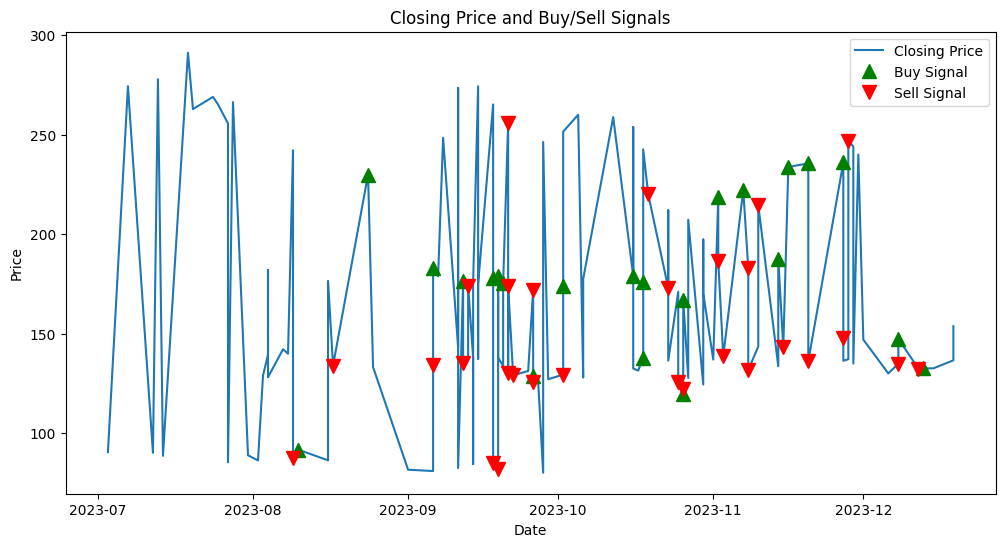

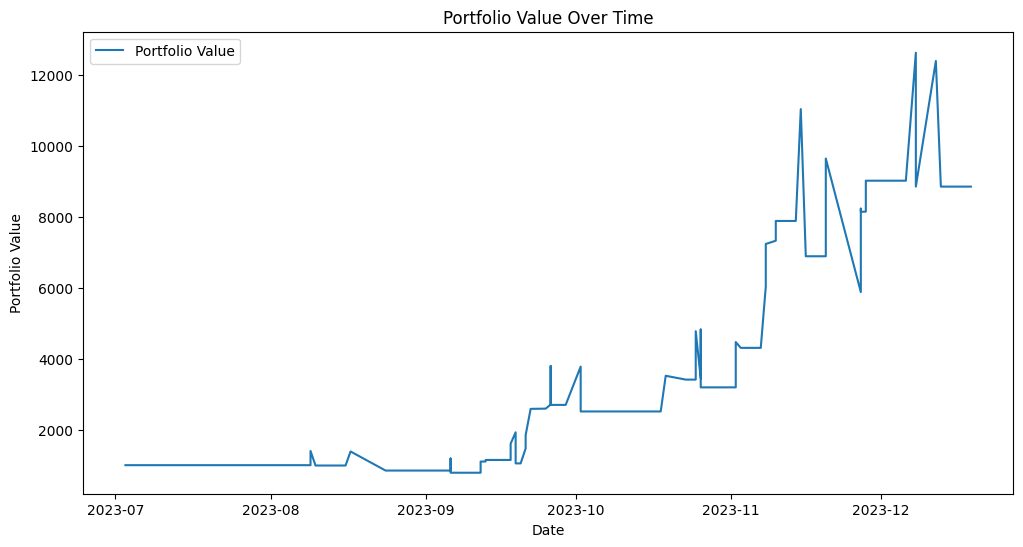

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Function to generate trading signals based on sentiment polarity and a simple moving average (SMA)
def generate_signals(db):
    db['SMA'] = db['Close'].rolling(window=20).mean()  # 20-day simple moving average
    db['Signal'] = 0
    db['Signal'] = np.where((db['polarity_score'] > 0) & (db['Close'] > db['SMA']), 1, db['Signal'])  # Buy signal
    db['Signal'] = np.where((db['polarity_score'] < 0) & (db['Close'] < db['SMA']), -1, db['Signal'])  # Sell signal
    db['Order'] = db['Signal'].diff()  # Detect changes in signals
    return db

# Function to calculate trading performance metrics including returns, Sharpe ratio, and win ratio
def calculate_performance(db, initial_cash=1000, stop_loss_pct=0.10, take_profit_pct=0.20, position_size_pct=0.20):
    cash = initial_cash
    position = 0
    purchase_price = 0
    portfolio_values = []
    
    for index, row in db.iterrows():
        if row['Order'] == -1 and cash > 0:  # Buy signal
            position = (cash * position_size_pct) / row['Close']
            cash += position * row['Close']
            purchase_price = row['Close']
        elif row['Order'] == 1 and position > 0:  # Sell signal
            cash -= position * row['Close']
            position = 0
        elif position > 0:
            if row['Close'] < purchase_price * (1 - stop_loss_pct):  # Stop-loss condition
                cash += position * row['Close']
                position = 0
                db.loc[index, 'Order'] = -1  # Mark this as a sell due to stop-loss
            elif row['Close'] > purchase_price * (1 + take_profit_pct):  # Take-profit condition
                cash += position * row['Close']
                position = 0
                db.loc[index, 'Order'] = -1  # Mark this as a sell due to take-profit

        portfolio_value = cash + position * row['Close']
        portfolio_values.append(portfolio_value)

    db['Portfolio Value'] = portfolio_values
    final_portfolio_value = portfolio_values[-1]
    returns = db['Portfolio Value'].pct_change().dropna()
    sharpe_ratio = (252**0.5) * returns.mean() / returns.std()  # Assuming 252 trading days in a year
    total_trades = len(db[db['Order'].abs() == 1])
    winning_trades = len(db[(db['Order'] == -1) & (db['Close'] > db['Close'].shift(1))])
    win_ratio = winning_trades / total_trades if total_trades > 0 else 0

    performance = {
        "Final Portfolio Value": final_portfolio_value,
        "Sharpe Ratio": sharpe_ratio,
        "Number of Trades Executed": total_trades,
        "Win Ratio": win_ratio
    }

    return performance



# Ensure 'Date' column is in datetime format and sort by date
analysis_table['Date'] = pd.to_datetime(analysis_table['Date'])
analysis_table = analysis_table.sort_values(by='Date')

# Generate signals and calculate performance metrics
analysis_table = generate_signals(analysis_table)
performance = calculate_performance(analysis_table)

# Print performance metrics
print(f"Final Portfolio Value: ${performance['Final Portfolio Value']:.2f}")
print(f"Sharpe Ratio: {performance['Sharpe Ratio']:.2f}")
print(f"Number of Trades Executed: {performance['Number of Trades Executed']}")
print(f"Win Ratio: {performance['Win Ratio']:.2f}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(analysis_table['Date'], analysis_table['Close'], label='Closing Price')

# Plot buy signals
buy_signals = analysis_table[analysis_table['Order'] == 1]
plt.plot(buy_signals['Date'], buy_signals['Close'], '^', markersize=10, color='g', label='Buy Signal')

# Plot sell signals
sell_signals = analysis_table[analysis_table['Order'] == -1]
plt.plot(sell_signals['Date'], sell_signals['Close'], 'v', markersize=10, color='r', label='Sell Signal')

plt.title('Closing Price and Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot portfolio value over time
plt.figure(figsize=(12, 6))
plt.plot(analysis_table['Date'], analysis_table['Portfolio Value'], label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

# Save analysis_table to CSV file
final_path_csv = 'path_to_save_signals.csv'  # Adjust the path to your desired output file location
if not os.path.isfile(final_path_csv):
    pd.DataFrame(columns=analysis_table.columns).to_csv(final_path_csv, index=False)
analysis_table.to_csv(final_path_csv, index=False)
